In [2]:
from src.simulation_utils import *

In [12]:
mug_inds = [16] #15, 50, 30, 28
# mug_poses = [[0.,-0.1,1.2,1,0,0,.0]]
# mug_poses = [[0.,0.2,1.2,1,0,0,.0]]
# mug_poses = [[-0., 0.0,1.2,1,0,0,.0]]
mug_poses = [[-0.2, -0.2,1.2,1,0,0,.0]]

S = Simulation("world4.g", mug_inds, mug_poses, addBalls=True)
C = Configuration("world4.g", exp_name='PIFO_best', mug_inds=mug_inds)

In [13]:
with h5py.File('target1.hdf5', mode='r') as f:
    rgb1, projection1, obj_pos1, obj_r1 = f['rgb'][:], f['projection'][:], f['obj_pos'][:], f['obj_r'][:]
with h5py.File('target2.hdf5', mode='r') as f:
    rgb2, projection2, obj_pos2, obj_r2 = f['rgb'][:], f['projection'][:], f['obj_pos'][:], f['obj_r'][:]
    
key_points_list1, features_list1 = C.extractKeyFeatures(rgb1, projection1, obj_pos1, obj_r1)
key_points_list2, features_list2 = C.extractKeyFeatures(rgb2, projection2, obj_pos2, obj_r2)
target_list = [
    {"target_name_list": ['1','2'],
     "key_points_list": key_points_list1 + key_points_list2,
     "features_list": features_list1 + features_list2}]

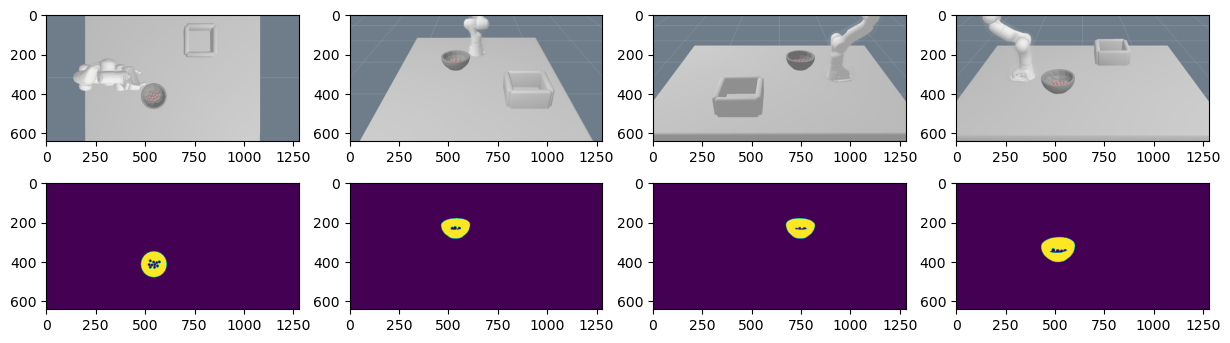

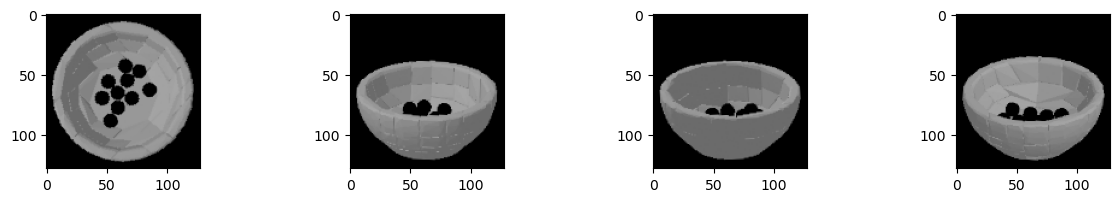

In [14]:
C.setJointState(S.get_q())
out = S.takePicture(mug_inds)
C.updatePIFO(mug_inds, *out[2:], target_list=target_list)
Skeleton = [["grasp", "", mug_inds[0]], 
            ["pose", "1", mug_inds[0]], 
            ["pose", "2", mug_inds[0]]]
traj, komo = C.solveKOMO(Skeleton)
# V = komo.view()
# V.playVideo(5.)

In [ ]:
V = komo.view()
V.playVideo(5.)

In [7]:
S = Simulation("world4.g", mug_inds, mug_poses, addBalls=True)
S.executeTrajectory(traj[:10])
grasped = S.closeGripper(mug_inds[0])
S.executeTrajectory(traj[10:])
S.stepNone(3.)

In [6]:
# t = 0
# save_dir = 'screenshots/imitation4/'
# S = Simulation("world4.g", mug_inds, mug_poses, addBalls=True)
# for i in range(10):
#     S.executeTrajectory(traj[i:i+1])
#     plt.imsave(save_dir+str(t).zfill(3)+'.png', S.S.getScreenshot()[::-1])
#     t += 1
# grasped = S.closeGripper(mug_inds[0])
# plt.imsave(save_dir+str(t).zfill(3)+'.png', S.S.getScreenshot()[::-1])
# t += 1
# for i in range(10,30):
#     S.executeTrajectory(traj[i:i+1])
#     plt.imsave(save_dir+str(t).zfill(3)+'.png', S.S.getScreenshot()[::-1])
#     t += 1
# for i in range(10):
#     S.stepNone(0.1)
#     plt.imsave(save_dir+str(t).zfill(3)+'.png', S.S.getScreenshot()[::-1])
#     t += 1

In [7]:
# os.system('ffmpeg -r 5 -pattern_type glob -i \'screenshots/imitation4/*.png\' -c:v libx264 imitation4.mp4')

0

In [19]:
str(1)

'001'